# **Define Problem**


Phishing involves using deceptive emails or websites to trick people into revealing personal information. These fake websites are designed to look genuine and are often indistinguishable from real ones. Detecting phishing sites has become crucial in cybersecurity to prevent data breaches and financial losses. Developing effective techniques for detecting these sites is a vital part of modern digital security strategies.

In [1]:
!pip install tldextract

Install it provides a straightforward and efficient way to extract top-level domains (TLDs) and subdomains from URLs.

In [2]:
!pip install metrics

In [3]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Randomization
import random

# Data visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.figure_factory as ff

# Data fetching and analysis
from pandas_datareader import data
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import tldextract

# Machine learning models and metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, mean_squared_error, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, make_scorer
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from scipy.sparse import csr_matrix

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Additional data analysis and visualization
import metrics
import seaborn as sb

# **Collecting Data**

In this stage, the data used is obtained from the Kaggle source at the following link: https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls

The content of the dataset includes 549,346 entries consisting of two important columns. The first column is the "Label" column, which serves as the prediction column and has two categories:

* Good - This category indicates that the URL does not contain malicious content, and the site is not a Phishing Site.

* Bad - This category indicates that the URL contains malicious content, and the site is a Phishing Site.

An important aspect of this dataset is the absence of missing values, ensuring that the data used in this analysis is complete and reliable. The significant number of entries and data completeness allow for more accurate analysis of the potential phishing sites and their characteristics.

In [4]:
# Loading the Data
data = pd.read_csv("phishing_site_urls.csv")

# Displaying the First 10 Rows
data.head(10)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


# **Check the data**

Checking the data is an essential step to ensure data quality, gain insights, address anomalies, and lay a solid foundation for meaningful analysis and decision-making.

<BarContainer object of 2 artists>

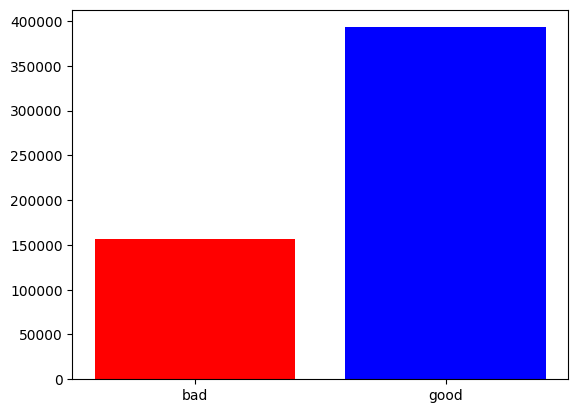

In [5]:
# Getting unique labels from the data
x1 = data.Label.unique()

# Counting occurrences of 'bad' and 'good' labels
y1 = np.array([data[data['Label'] == 'bad'].count()[0], data[data['Label'] == 'good'].count()[0]])

# Creating a bar plot
plt.bar(x1, y1, color=['red', 'blue'])

**💡 Insight:** This visualization reveals a significant class imbalance, with 'good' label instances outnumbering 'bad' label instances by approximately 2 to 1.

## check data null & nan

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [7]:
data.isna().any()

URL      False
Label    False
dtype: bool

**💡 Insight:** The dataset stands out for its complete and clean nature, with no presence of null values or NaN entries

In [8]:
data.shape

(549346, 2)

**💡 Insight:** It has 2 columns and 549346 rows.Links to websites are listed in the first column, and a second column indicates if the site is trustworthy or fraudulent (phishing).

# **Preprocessing**

Preprocessing is vital as it cleans, scales, and transforms data to enhance model performance, ensure compatibility with algorithms, and enable accurate analysis and predictions.

## Random Undersampling

<!-- Ini kalau Under sampling -->
To address the issue of class imbalance, I opted for undersampling due to the significant disparity between the classes and to mitigate the risk of overfitting.

<!-- ini kalau SMOTE -->
<!-- In addressing severe class imbalance, I utilized SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class by interpolating existing instances. This balances class distribution, enhances model generalization, and improves analysis accuracy, especially in cases of substantial class imbalances. -->

In [9]:
# Counting instances of 'bad' and 'good' classes
count_bad, count_good = data.Label.value_counts()

# Creating subsets for 'bad' and 'good' classes
class_bad = data[data['Label'] == 'bad']
class_good = data[data['Label'] == 'good']

# Displaying the initial counts
print("Class good:", class_good.shape[0])
print("Class bad:", class_bad.shape[0])

Class good: 392924
Class bad: 156422


In [10]:
# Randomly undersample the 'good' class
class_good_under = class_good.sample(count_bad)

# Create the new dataframe by concatenating the undersampled 'good' class and 'bad' class
df_under = pd.concat([class_good_under, class_bad], axis=0)

# Display the counts of the new dataset
print("New counts")
print("Class good:", df_under[df_under.Label == 'good'].shape[0])
print("Class bad:", df_under[df_under.Label == 'bad'].shape[0])

New counts
Class good: 392924
Class bad: 156422


In [11]:
# SMOTE (Synthetic Minority Over-sampling Technique)
# Note: Running time may exceed 1 hour.
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# Initialize SMOTE
# smote = SMOTE()

# Generating a new dataset by adding synthetic samples using SMOTE
# X_SMOTE, y_SMOTE = smote.fit_resample(X, y)

# Display class distribution before and after oversampling
# print("Class distribution in the original dataset:", Counter(y))
# print("Class distribution in the oversampled dataset:", Counter(y_SMOTE))

In [12]:
# Assigning the balanced and undersampled dataset to the variable 'data'
data = df_under

## URL Extraction

In [13]:
# Function to count the number of digits in a URL
def count_digits(string):
    total_number = 0
    for char_ in list(map(str, "0123456789")):
        total_number += string.lower().count(char_)
    return total_number

# Function to count the number of letters in a URL
def count_letter(string):
    total_letter = 0
    for char_ in list(map(str, "abcdefghijklmnopqrstuvwxyz")):
        total_letter += string.lower().count(char_)
    return total_letter

# Defining the names of features to be added for URL extraction
features = ["total_digits_domain", "total_digits_path", "total_digits_url",
            "total_letter_domain", "total_letter_path", "total_letter_url",
            "len_domain", "len_url", "len_path"]

# Initializing a dictionary to store the newly calculated features based on the processed URL
new_data = {"len_domain": [],
            "len_path": [],
            "len_url": [],
            "total_digits_domain": [],
            "total_digits_path": [],
            "total_digits_url": [],
            "total_letter_domain": [],
            "total_letter_path": [],
            "total_letter_url": []}

# Function to calculate new metrics or features based on the currently processed URL
# and store their values in the 'new_data' data structure.
for index, current in enumerate(data["URL"]):
    # Splitting the URL into domain and path
    url_split = current.split("/", 1)
    if len(url_split) == 2:
        domain, path = url_split[0], url_split[1]
    else:
        domain, path = url_split[0], ""

    new_data["total_digits_domain"].append(count_digits(domain))
    new_data["total_digits_path"].append(count_digits(path))
    new_data["total_digits_url"].append(count_digits(current))

    new_data["total_letter_domain"].append(count_letter(domain))
    new_data["total_letter_path"].append(count_letter(path))
    new_data["total_letter_url"].append(count_letter(current))

    new_data["len_domain"].append(len(domain))
    new_data["len_path"].append(len(path))
    new_data["len_url"].append(len(current))

In [14]:
# Incorporating the calculations into the 'new_data' dictionary
for feature in features:
    data[feature] = new_data[feature]

In [15]:
# View the first 10 rows of the updated data DataFrame
data.head(10)

,URL,Label,total_digits_domain,total_digits_path,total_digits_url,total_letter_domain,total_letter_path,total_letter_url,len_domain,len_url,len_path
380641,lyricsmania.com/wicked_maiden_lyrics_impellitt...,good,0,0,0,14,34,48,15,54,38
320782,eliteprospects.com/player.php?player=18471,good,0,5,5,17,15,32,18,42,23
148633,belgravesoundandlight.com/,good,0,0,0,24,0,24,25,26,0
403643,newegg.com/Store/SubCategory.aspx?SubCategory=...,good,0,2,2,9,60,69,10,82,71
443506,theblurb.ca/professional_services/Gestion_Jean...,good,0,6,6,10,47,57,11,73,61
287249,bandigan.com/stockroom/index.html,good,0,0,0,11,18,29,12,33,20
362907,interment.net/us/wa/yakima.htm,good,0,0,0,12,13,25,13,30,16
294756,boxxelders.com/,good,0,0,0,13,0,13,14,15,0
406880,nowpublic.com/sports/alex-burrows-stephane-aug...,good,0,7,7,12,60,72,13,91,77
151694,blueridgeparkway75.org/more-than-a-road/map/,good,2,0,2,19,16,35,22,44,21


# **EDA**

EDA is essential as it helps uncover patterns, anomalies, and insights in data, enabling informed decisions, hypothesis generation, and efficient preprocessing for accurate analysis and modeling.

## Visualization label good

In [16]:
# Function to plot the mean, median, and mode using a KDE plot for each feature
def get_kdeplot_central_tendency(df: dict, fields: list, target: str):
    colors = sns.color_palette('cool')
    for field in fields:
        # Create subplots
        f, (ax1) = plt.subplots(figsize=(10, 3), dpi=100)

        # Get the data values for the current feature
        v_dist_1 = df[field].values

        # Remove spines and plot the KDE
        for spline in ['top', 'right', 'left']:
            ax1.spines[spline].set_visible(False)
        sns.kdeplot(v_dist_1, ax=ax1, palette=colors)

        # Calculate mean, median, and mode
        mean = df[field].mean()
        median = df[field].median()
        mode = df[field].mode().values[0]

        # Add vertical lines for mean, median, and mode
        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Median")
        ax1.axvline(mode, color='b', linestyle='-', label="Mode")

        # Adjust plot settings
        ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
        ax1.set_xlabel('count', fontsize=13, color='#333F4B')
        ax1.set_ylabel(field, fontsize=13, color='#333F4B')
        ax1.legend()
        plt.grid(False)
        plt.plot(color="white", lw=3)
        plt.tight_layout()
        f.suptitle(f"Representation KDE Plot for {field} - {target}", fontsize=18)

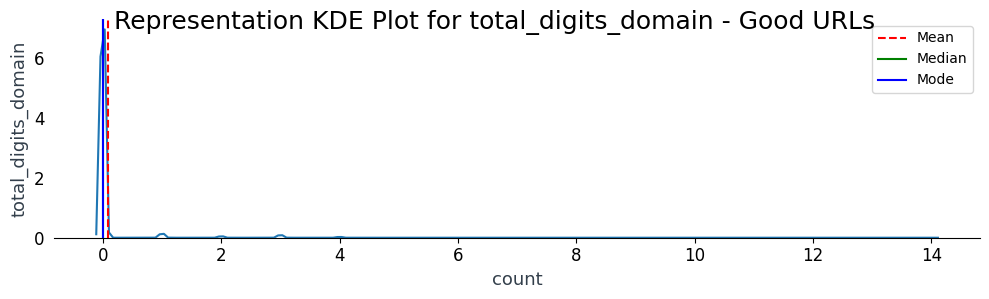

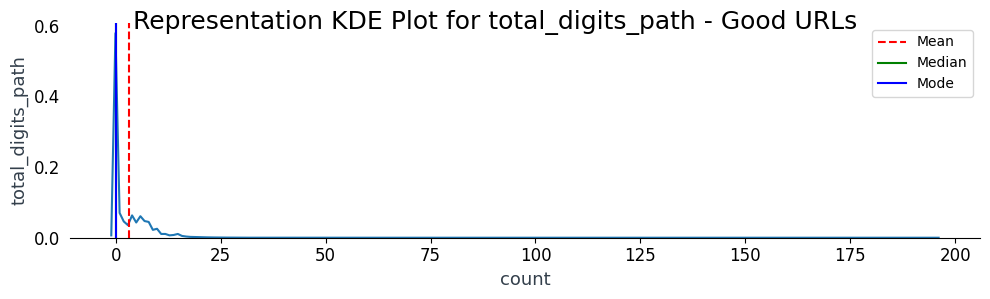

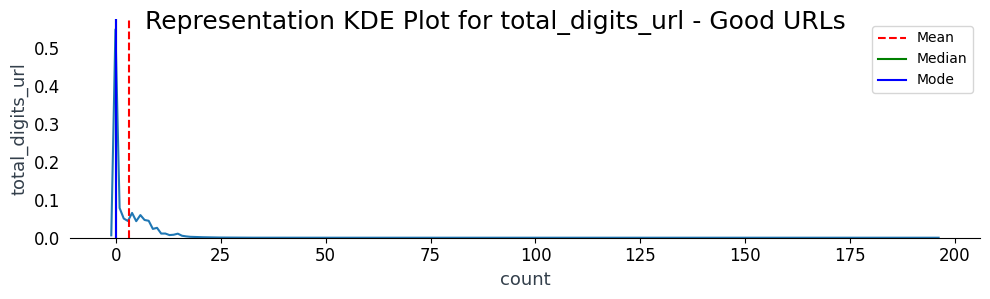

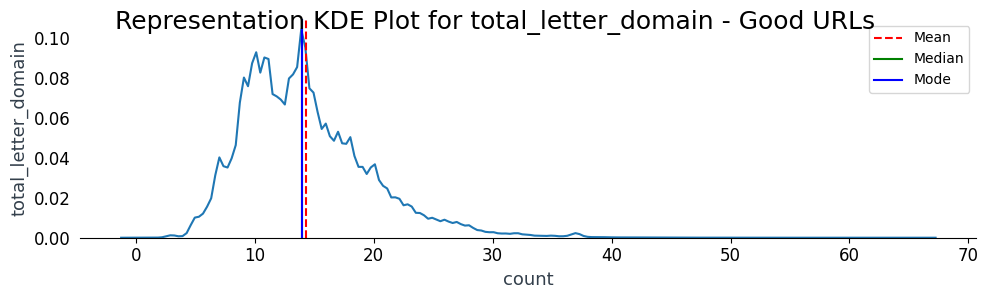

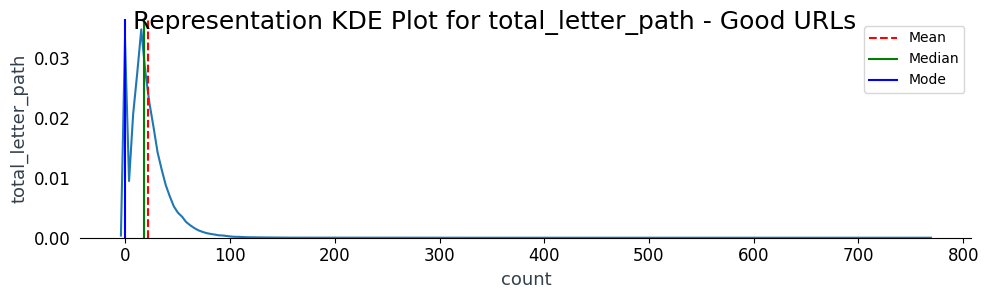

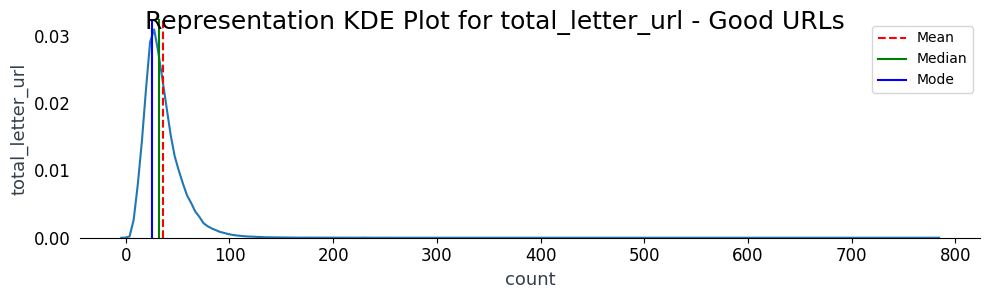

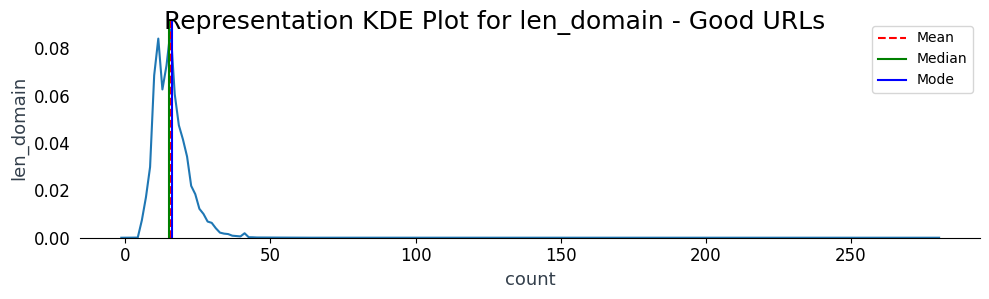

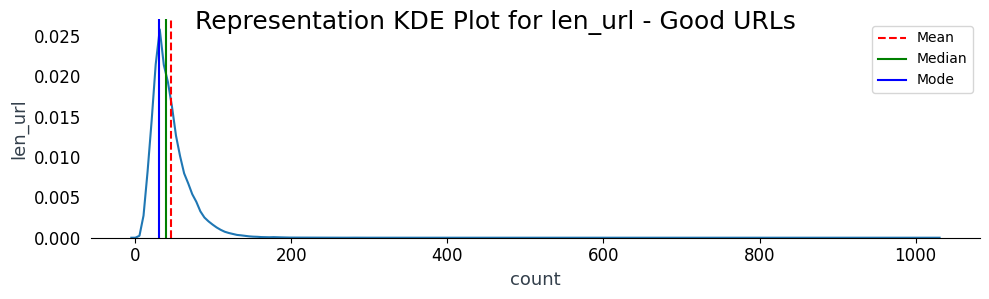

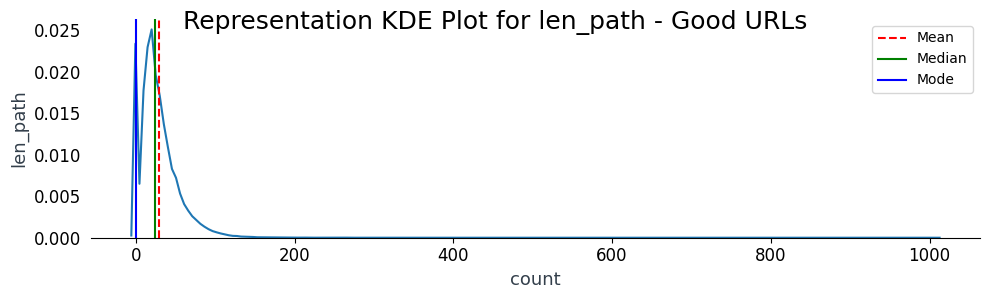

In [17]:
# Displaying KDE plots for all features with label "Good"
get_kdeplot_central_tendency(data.query('Label == "good"'), features, "Good URLs")

## Convert dictionary menjadi DataFrame

In [18]:
# Function to convert a dictionary into a Pandas DataFrame with two columns: "name" and "total"
def dict_to_dataframe(dictionary: dict):
    pandas_to = {"name": [], "total": []}
    for name, value in dictionary.items():
        # Check if name has any non-space characters before adding to DataFrame
        if len(name.replace(" ", "")) > 0:
            pandas_to["name"].append(name)
            pandas_to["total"].append(value)

    # Create a DataFrame from the constructed dictionary and sort it by 'total' in descending order
    return pd.DataFrame(pandas_to).sort_values(by=['total'], ascending=False)

In [19]:
# Counting the occurrences of each domain suffix related to "good" and "bad" labels from URLs in the dataset.
total_suffix_good = {}  # To store suffix information for "good" labels
total_suffix_bad = {}   # To store suffix information for "bad" labels

# Loop through URL and label pairs
for current, target in zip(data["URL"], data["Label"]):
    url_tldextract = tldextract.extract(current)
    suffix_tld = url_tldextract.suffix  # Extract the domain suffix from the URL using tldextract

    if target == "good":
        if suffix_tld not in total_suffix_good:  # Check if the suffix is not yet in the total_suffix_good dictionary
            total_suffix_good[suffix_tld] = 0    # If not, add an entry with 'suffix_tld' as key and initial value 0
        total_suffix_good[suffix_tld] += 1       # Increment the count by 1 in the dictionary.

    if target == "bad":
        if suffix_tld not in total_suffix_bad:   # Check if the suffix is not yet in the total_suffix_bad dictionary
            total_suffix_bad[suffix_tld] = 0     # If not, add an entry with 'suffix_tld' as key and initial value 0
        total_suffix_bad[suffix_tld] += 1        # Increment the count by 1 in the dictionary.

In [20]:
# Converting to DataFrames
df_tld_top_bad = dict_to_dataframe(total_suffix_bad)
df_tld_top_good = dict_to_dataframe(total_suffix_good)

## Visualisasi bar plot data yang diubah menjadi data frame

In [21]:
def bar_plot_data(df: dict, subtitle: str, figsize=(5, 4), inverted_x=True):
    # Create a bar plot for the data in the DataFrame 'df'
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)

    # Remove spines from the plot
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)

    # Create a bar plot using seaborn
    sns.barplot(data=df, palette='cool', x="name", y="total")

    # Adjust plot settings
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel('Domain Suffix', fontsize=13, color='#333F4B')
    ax1.set_ylabel('Count', fontsize=13, color='#333F4B')

    # Rotate x-axis labels if specified
    if inverted_x:
        plt.xticks(rotation=90)

    plt.plot(color="white", lw=3)

    # Add a title to the plot
    fig.suptitle(subtitle, fontsize=18)

    # Display the plot
    plt.show()

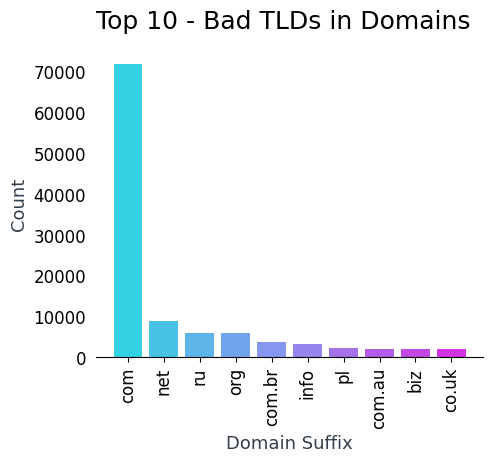

In [22]:
# Display a bar plot for the top 10 "bad" domain suffixes
bar_plot_data(df=df_tld_top_bad.head(10), subtitle="Top 10 - Bad TLDs in Domains")

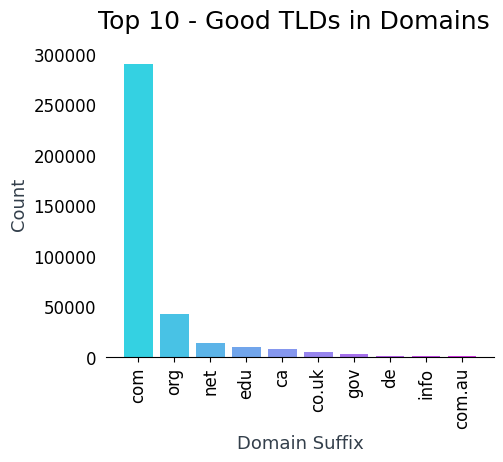

In [23]:
# Display a bar plot for the top 10 "good" domain suffixes
bar_plot_data(df=df_tld_top_good.head(10), subtitle="Top 10 - Good TLDs in Domains")

## Visualization label bad

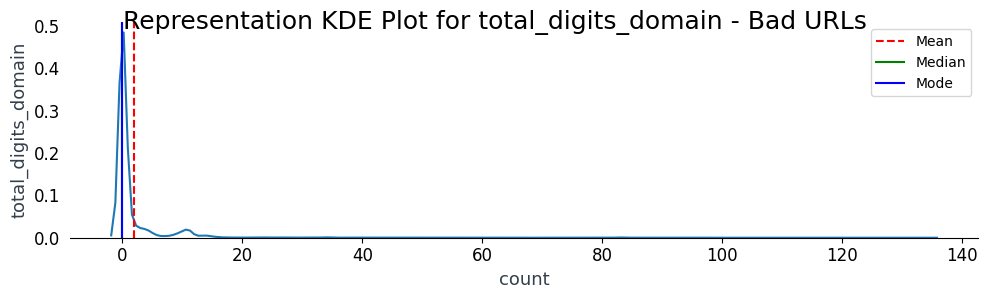

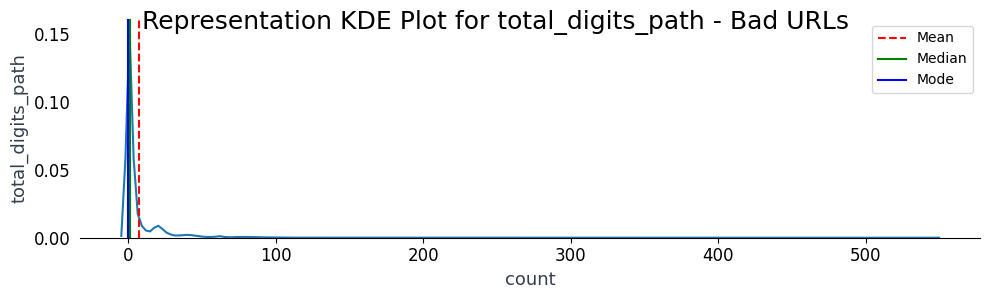

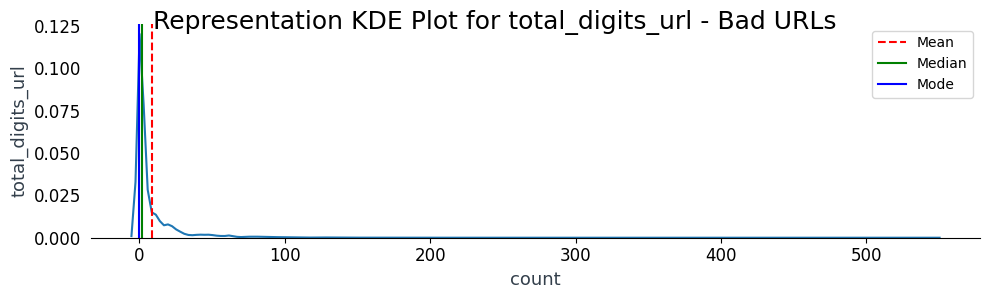

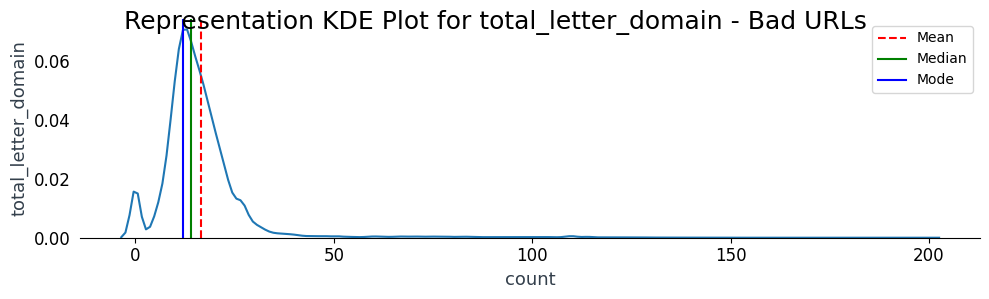

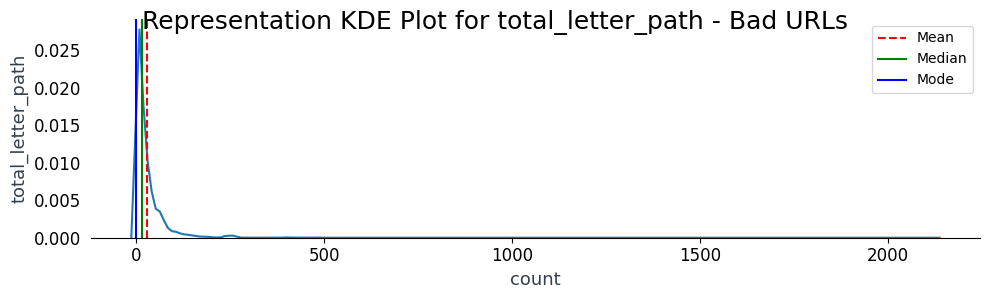

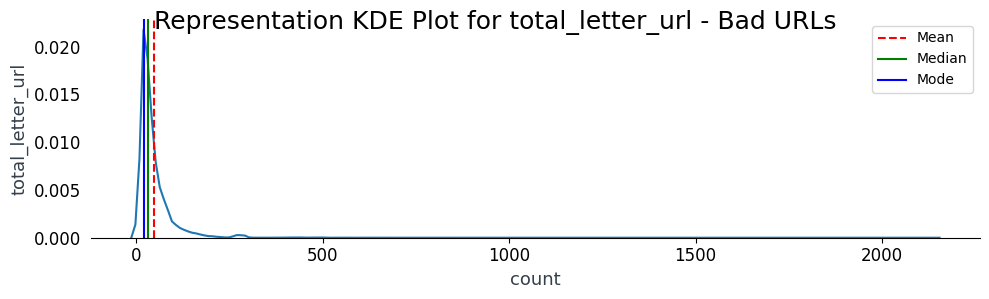

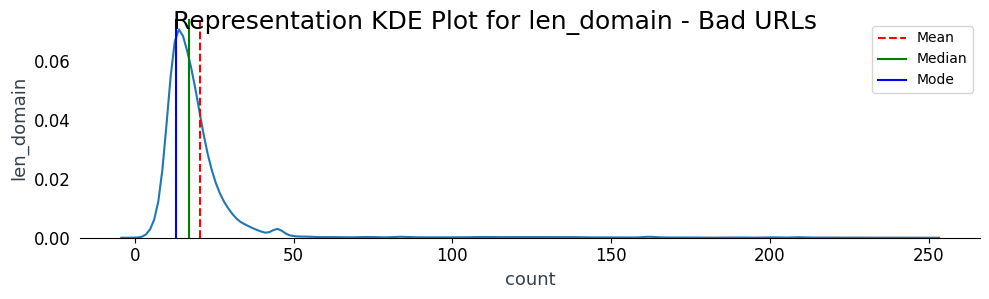

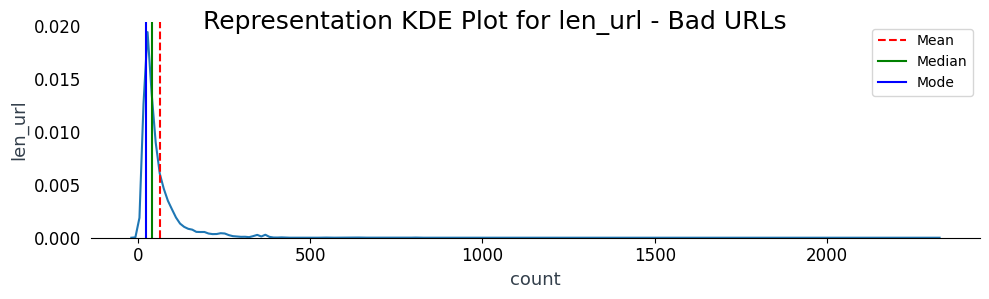

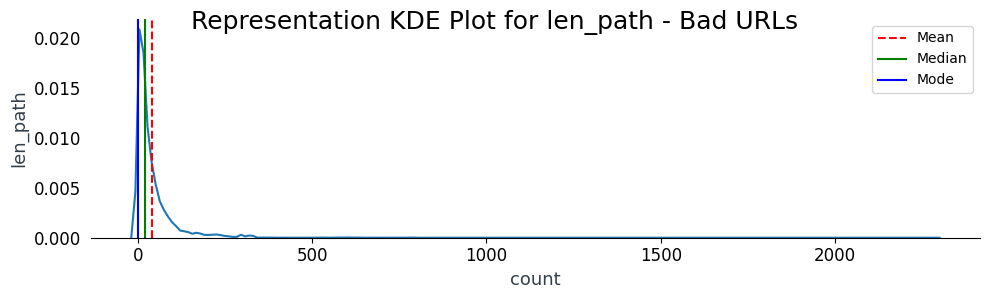

In [24]:
# Displaying KDE plots for all features with label "bad"

get_kdeplot_central_tendency(data.query('Label == "bad"'), features, "Bad URLs")

# **Feature Engineering**

 feature engineering is a strategic process that transforms raw data into a representation that amplifies the strengths of machine learning models and mitigates their limitations, ultimately contributing to better decision-making and outcomes.

## n-gram

n-grams helps leverage the sequential nature of text data, allowing us to extract meaningful patterns and characteristics that contribute to more effective analysis, modeling, and decision-making.

In [25]:
import nltk
nltk.download('punkt')  # Download NLTK resources for tokenization
import tldextract  # Library for URL parsing
from urllib.parse import urlparse  # Library for URL parsing

from nltk.util import ngrams  # NLTK utility for generating n-grams

# Function to generate n-grams from a URL.
# In this case, n-grams are used to assist in identifying patterns or information within the URL.
def generate_url_ngrams(n: int, url: str):
    url_formatted = ''
    for index, char in enumerate(url):
        if index % n == 0:
            url_formatted += ' '  # Insert space every 'n' characters
        url_formatted += char
    sequence = " ".join(url_formatted.strip().split())  # Remove extra spaces at both ends
    tokens = nltk.word_tokenize(sequence)  # Tokenize the sequence
    ngram = list(nltk.ngrams(tokens, n=n))  # Generate n-grams
    ngram_url = {}

    for grams in ngram:
        for gx in grams:
            ngram_url[gx] = 1  # Store n-grams in a dictionary
    return ngram_url

# Function to extract various information from a URL, such as domain, subdomain, and other components.
# This information is obtained using 'tldextract' and 'urlparse'.
def get_fields_url(url: str):
    try:
        static_features = dict()  # Initialize a dictionary to store features

        url_tldextract = tldextract.extract(url)  # Extract domain components using 'tldextract'
        url_urlparse = urlparse(f"http://{url}")  # Parse the URL using 'urlparse'

        # List to store metadata components of the URL
        url_metadata = [
            {"name": "domain", "string": url_tldextract.domain},
            {"name": "subdomain", "string": url_tldextract.subdomain},
            {"name": "suffix", "string": url_tldextract.suffix},
            {"name": "path", "string": url_urlparse.path},
            {"name": "params", "string": url_urlparse.params},
            {"name": "query", "string": url_urlparse.query},
            {"name": "fragment", "string": url_urlparse.fragment}
        ]

        static_features.update(generate_url_ngrams(2, url_tldextract.domain))  # Add n-grams of the domain to features

        for current in url_metadata:
            # Store various characteristics of the URL in the feature dictionary
            static_features[f'len_{current["name"]}'] = len(current["string"])
            for char_ in list(map(str, "-@_?=&./,")):
                static_features[f'char{char_}-{current["name"]}'] = current["string"].count(char_)

            if "domain" == current["name"] or "path" == current["name"]:
                total_letter, total_number = 0, 0
                # Count the characters
                for char_ in list(map(str, "abcdefghijklmnopqrstuvwxyz")):
                    total_letter += current["string"].lower().count(char_)

                # Count the numbers
                for char_ in list(map(str, "0123456789")):
                    total_number += current["string"].lower().count(char_)

                static_features[f'letter_len_{current["name"]}'] = total_letter
                static_features[f'number_len_{current["name"]}'] = total_number
    except:
        return None
    return static_features


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# Example Results of performing URL extraction and n-grams
features_json = get_fields_url("apple-checker.org/	")
print(features_json)

{'ap': 1, 'pl': 1, 'e-': 1, 'ch': 1, 'ec': 1, 'ke': 1, 'r': 1, 'len_domain': 13, 'char--domain': 1, 'char@-domain': 0, 'char_-domain': 0, 'char?-domain': 0, 'char=-domain': 0, 'char&-domain': 0, 'char.-domain': 0, 'char/-domain': 0, 'char,-domain': 0, 'letter_len_domain': 12, 'number_len_domain': 0, 'len_subdomain': 0, 'char--subdomain': 0, 'char@-subdomain': 0, 'char_-subdomain': 0, 'char?-subdomain': 0, 'char=-subdomain': 0, 'char&-subdomain': 0, 'char.-subdomain': 0, 'char/-subdomain': 0, 'char,-subdomain': 0, 'len_suffix': 3, 'char--suffix': 0, 'char@-suffix': 0, 'char_-suffix': 0, 'char?-suffix': 0, 'char=-suffix': 0, 'char&-suffix': 0, 'char.-suffix': 0, 'char/-suffix': 0, 'char,-suffix': 0, 'len_path': 1, 'char--path': 0, 'char@-path': 0, 'char_-path': 0, 'char?-path': 0, 'char=-path': 0, 'char&-path': 0, 'char.-path': 0, 'char/-path': 1, 'char,-path': 0, 'letter_len_path': 0, 'number_len_path': 0, 'len_params': 0, 'char--params': 0, 'char@-params': 0, 'char_-params': 0, 'char?-

## Label Encoding dan convert data to list.

* **Label Encoding**: Label Encoding is used for converting categorical labels into numerical values. It is not directly related to n-gram analysis, which is a technique used to analyze the sequences of words or characters within a given text. If your goal is to perform n-gram analysis, there is no need to perform Label Encoding on your text data.

* **Convert Data to a List:** While converting data to a list of sentences or documents is a common practice in text processing, it is not a mandatory step for n-gram analysis itself. N-gram analysis can be applied directly to the text data without requiring explicit conversion to a list. The concept of n-grams involves extracting contiguous sequences of 'n' words or characters from the text.

In [27]:
output = []      # List to store the target labels (0 for "good" and 1 for "bad")
features = []    # List to store the extracted features (JSON objects)

# Using 'zip' to combine URL data with corresponding labels
for url, target in zip(data["URL"], data["Label"]):
    # Extract features from the URL using 'get_fields_url' function
    features_json = get_fields_url(url)

    # Check if features were successfully extracted
    if features_json:
        # Convert label from "bad" or "good" to integer (0 or 1)
        if target == "bad":
            target_int = 1
        elif target == "good":
            target_int = 0

        # Store the label and features in respective lists
        output.append(target_int)
        features.append(features_json)

In [28]:
unique_elements = set(output)   # Creating a set to store unique values from the 'output' list
# Printing the unique values along with their interpretation
print(unique_elements)

{0, 1}


In [29]:
# Calculate and print the lengths of 'features' and 'output' lists
print(len(features), len(output))

549333 549333


## One-hot-encoding and sparse matrix conversion

 **one-hot encoding** is crucial for properly representing categorical data in a numerical format, while converting data to **sparse matrices** is important for efficiently handling high-dimensional, sparse datasets in terms of memory and computation. Both techniques contribute to improving the performance, efficiency, and interpretability of machine learning models.

In [30]:
pre_processor = DictVectorizer(sparse=True)  # This is from scikit-learn and is used to convert a collection of dictionaries into a numeric matrix.
X = pre_processor.fit_transform(features)  # Performs the conversion of features into a numeric matrix and learns feature patterns from the data.
X = csr_matrix(X)  # Converts the matrix into the csr_matrix data type from scipy. Typically used when the matrix has many zero values.
# Using csr_matrix helps save memory and computation efficiency.
X = X.tocsr()  # This performs a conversion to the csr data type. This is done to confirm that 'X' remains in 'csr_matrix' format.
y = np.array(output).astype(int)

## Data splitting

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, train_size=0.8)

## Evaluation function

In [32]:
from sklearn import metrics

def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):

    # Predictions on testing data
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))

    # Predictions on training data
    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    # Precision, recall, and F1-score
    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))

    # Confusion matrix visualization
    cf1 = confusion_matrix(y_test,tree_predict)
    sb.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    # Classification report
    print(classification_report(y_test,  trained_model.predict(x_test)))

# **Classification Modelling**

Afterward, I engage in the modeling process, utilizing a selection of algorithms that encompass XGBoost, Random Forest, Gradient Boosting Classifier, Neural Networks, Logistic Regression, and Linear SVC.

Subsequently, I evaluate the model performance utilizing a comprehensive set of metrics, which includes the informative confusion matrix, along with essential measures such as accuracy, precision, recall, and F1-score.

## XGBoost

In [33]:
# Let's creating a XGBoost classifier with specific hyperparameters
def get_xgboost():
    return XGBClassifier(learning_rate=0.3, n_estimators=100,
                             objective='binary:logistic', seed=1,
                             n_jobs=-1, max_depth=8,
                             colsample_bytree=1.0,
                             subsample=1.0)

In [34]:
# Create an XGBoost classifier model with predefined hyperparameters
model = get_xgboost()

# Train the XGBoost classifier using the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Testing accuracy   : 93.01246052044745 %
MSE [TEST]          : 0.0698753947955255
Training accuracy  : 93.71509968916821 %
MSE [TRAIN]         : 0.06284900310831783
precision :  0.9301246052044745
recall    :  0.9301246052044745
f1_score  :  0.9301246052044744


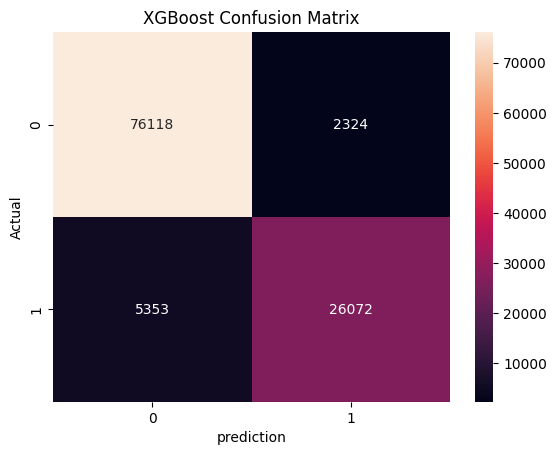

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     78442
           1       0.92      0.83      0.87     31425

    accuracy                           0.93    109867
   macro avg       0.93      0.90      0.91    109867
weighted avg       0.93      0.93      0.93    109867



In [35]:
get_accuracy('XGBoost', model, X_train, y_train, X_test, y_test)

## Random Forest

In [36]:
# Let's creating a Random Forest with specific hyperparameters
def get_random_forest():
    return RandomForestClassifier(n_estimators=100,
                                  max_depth=10,
                                  min_samples_split=2,
                                  random_state=1)

In [37]:
# Create an Random Forest model with predefined hyperparameters
model = get_random_forest()

# Train the Random Forest using the training data
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

Testing accuracy   : 76.10383463642404 %
MSE [TEST]          : 0.2389616536357596
Training accuracy  : 76.23684198550058 %
MSE [TRAIN]         : 0.23763158014499416
precision :  0.7610383463642404
recall    :  0.7610383463642404
f1_score  :  0.7610383463642404


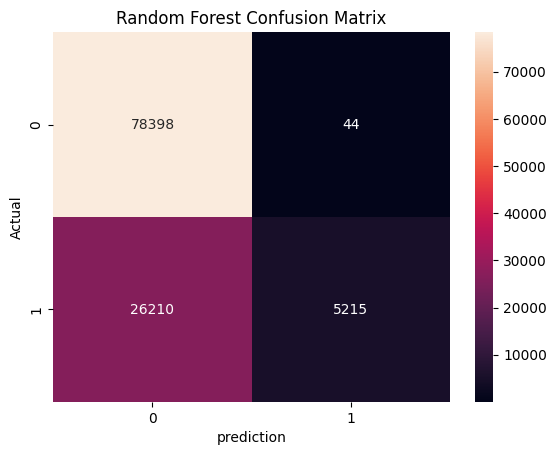

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     78442
           1       0.99      0.17      0.28     31425

    accuracy                           0.76    109867
   macro avg       0.87      0.58      0.57    109867
weighted avg       0.82      0.76      0.69    109867



In [38]:
# Evaluate the performance of the Random Forest model using the get_accuracy function
get_accuracy('Random Forest', model, X_train, y_train, X_test, y_test)

## Gradient Boosting Classifier

In [39]:
# Let's creating a Gradient Boosting Classifier with specific hyperparameters
def get_GBC():
  return GradientBoostingClassifier(n_estimators=100,
                                    learning_rate=1.0,
                                    max_depth=3,
                                    random_state=1
                                    )

In [40]:
# Create a Gradient Boosting Classifier (GBC) model
model = get_GBC()

# Train the Gradient Boosting Classifier (GBC) model using the training data
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=1)

Testing accuracy   : 90.3838277189693 %
MSE [TEST]          : 0.09616172281030701
Training accuracy  : 90.70781357374632 %
MSE [TRAIN]         : 0.0929218642625368
precision :  0.903838277189693
recall    :  0.903838277189693
f1_score  :  0.903838277189693


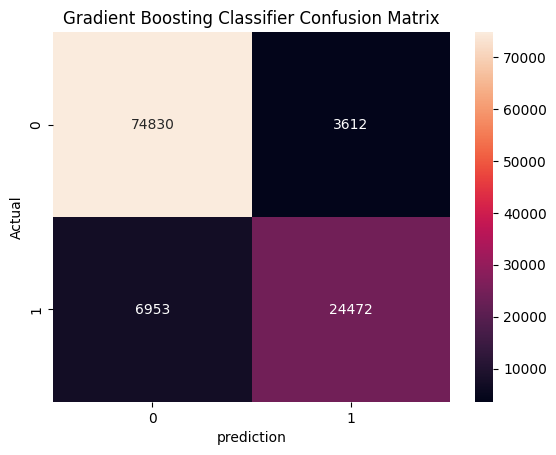

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     78442
           1       0.87      0.78      0.82     31425

    accuracy                           0.90    109867
   macro avg       0.89      0.87      0.88    109867
weighted avg       0.90      0.90      0.90    109867



In [41]:
# Evaluate the performance of the Gradient Boosting model using the get_accuracy function
get_accuracy('Gradient Boosting Classifier', model, X_train, y_train, X_test, y_test)

## Neural Networks

In [42]:
def get_neural_network():
    model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', random_state=1, max_iter=100)
    return model

# Create a Neural Network (MLPClassifier) model
model = get_neural_network()

# Train the Neural Network (MLPClassifier) model using the training data
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=100, random_state=1)

Testing accuracy   : 92.642012615253 %
MSE [TEST]          : 0.07357987384747013
Training accuracy  : 94.30081052914218 %
MSE [TRAIN]         : 0.056991894708578135
precision :  0.9264201261525299
recall    :  0.9264201261525299
f1_score  :  0.9264201261525299


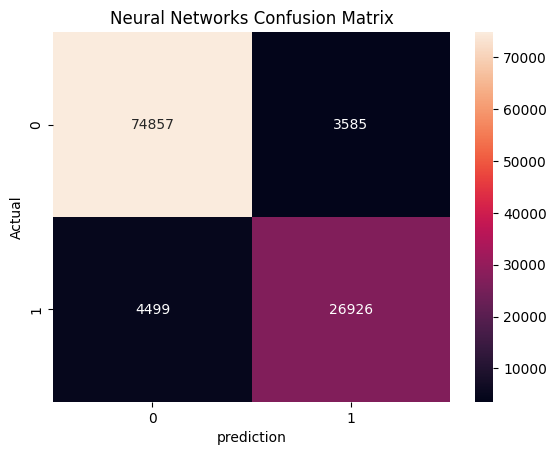

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     78442
           1       0.88      0.86      0.87     31425

    accuracy                           0.93    109867
   macro avg       0.91      0.91      0.91    109867
weighted avg       0.93      0.93      0.93    109867



In [43]:
# Evaluate the performance of the Neural Network model using the get_accuracy function
get_accuracy('Neural Networks', model, X_train, y_train, X_test, y_test)

## Logistic Regression

In [44]:
def get_lr():
    model = LogisticRegression()
    return model

# Create a Logistic Regression model
model = get_lr()

# Train the Logistic Regression model using the training data
model.fit(X_train, y_train)

LogisticRegression()

Testing accuracy   : 80.88324974742189 %
MSE [TEST]          : 0.19116750252578119
Training accuracy  : 80.96166711417948 %
MSE [TRAIN]         : 0.1903833288582052
precision :  0.8088324974742188
recall    :  0.8088324974742188
f1_score  :  0.8088324974742188


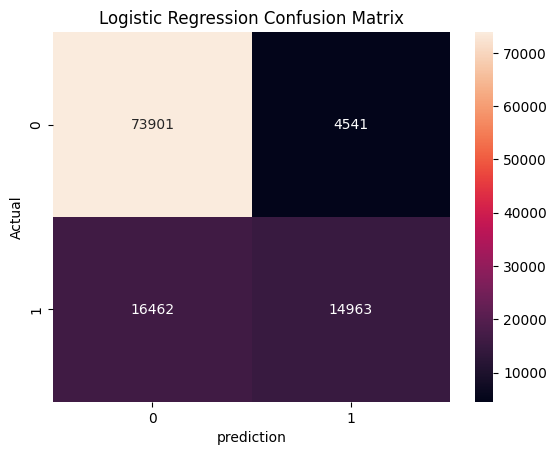

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     78442
           1       0.77      0.48      0.59     31425

    accuracy                           0.81    109867
   macro avg       0.79      0.71      0.73    109867
weighted avg       0.80      0.81      0.79    109867



In [45]:
# Evaluate the performance of the Logistic Regression model using the get_accuracy function
get_accuracy('Logistic Regression', model, X_train, y_train, X_test, y_test)

## Linear SVC

In [47]:
from sklearn.svm import LinearSVC

def get_linearSVC():
    model = LinearSVC()
    return model

model = get_linearSVC()
model.fit(X_train, y_train)

LinearSVC()

Testing accuracy   : 80.02584943613643 %
MSE [TEST]          : 0.1997415056386358
Training accuracy  : 80.09243035866255 %
MSE [TRAIN]         : 0.19907569641337441
precision :  0.8002584943613642
recall    :  0.8002584943613642
f1_score  :  0.8002584943613642


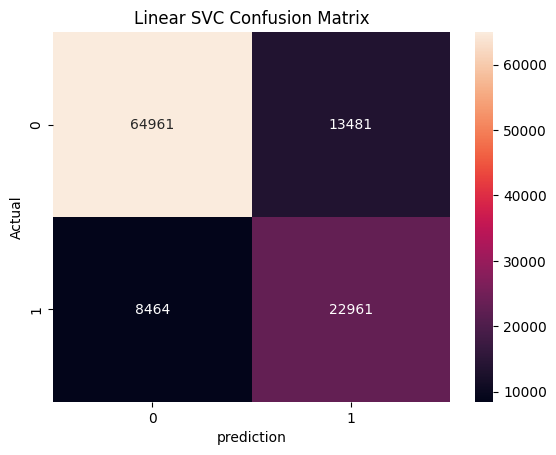

              precision    recall  f1-score   support

           0       0.88      0.83      0.86     78442
           1       0.63      0.73      0.68     31425

    accuracy                           0.80    109867
   macro avg       0.76      0.78      0.77    109867
weighted avg       0.81      0.80      0.80    109867



In [48]:
# Evaluate the performance of the Linear SVC model using the get_accuracy function
get_accuracy('Linear SVC', model, X_train, y_train, X_test, y_test)

# **Conclusion**

Based on the comprehensive analysis conducted using various evaluation metrics, the model's performance emerges as highly promising, with an impressive accuracy of 92% achieved through the utilization of the XGBoost evaluation metric. This achievement underscores the model's ability to effectively distinguish between legitimate and potentially harmful URLs, positioning it as a robust tool for phishing link detection.

The model's success can be attributed to its meticulous domain-level analysis, coupled with insightful scrutiny of subdomains, suffixes, paths, parameters, queries, fragments, character counts, and numerical occurrences. By transforming these diverse aspects into a structured matrix, the model gains a nuanced understanding of the unique patterns and signatures that differentiate legitimate URLs from fraudulent ones. This matrix-driven approach, guided by the intelligent algorithms of XGBoost, provides a comprehensive framework for swift and accurate identification of phishing links.